In [60]:
import tensorflow as tf
import numpy as np

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Определяем модель нейронной сети
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(64,)),
  tf.keras.layers.Dense(64, activation='sigmoid'),
  tf.keras.layers.Dense(4, activation='sigmoid'),
])

In [61]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Компилируем модель
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [62]:
from spectrum import font, font_ids, test_ids, test_labels

train_data = []
train_labels = []

font_len = len(font_ids)
for i in range(font_len):
  train_data.append(font[font_ids[i]])
  train_labels.append(i)

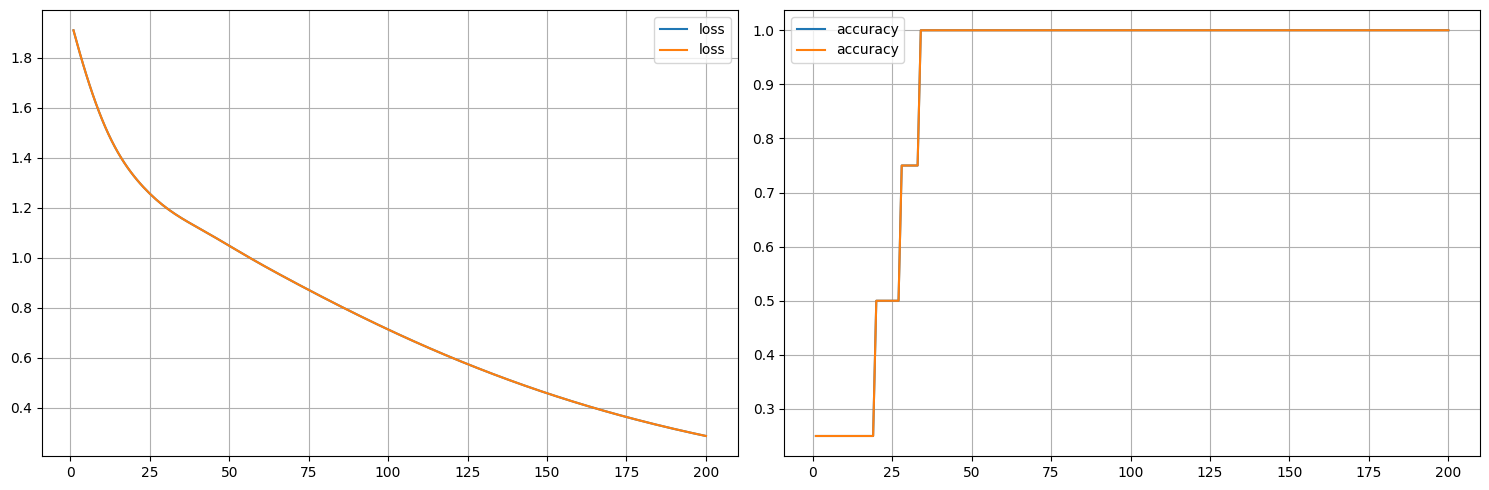

1/1 [==============================] - 0s 244ms/step - loss: 0.2880 - accuracy: 1.0000


In [63]:
from plot_learning import PlotLearning

model.fit(train_data, train_labels, epochs=200, batch_size=5, callbacks=[PlotLearning()])

In [64]:
from colors import bcolors as bc

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

test_count = len(test_ids)
for i in range(test_count):
  input_data = np.expand_dims(font[test_ids[i]], axis=0)
  predictions = probability_model.predict(input_data)
  print(f'{bc.OKBLUE}predictions{bc.ENDC}', predictions)

  index = np.argmax(predictions)
  is_true = test_ids[index] == test_labels[i]
  print(
    'with prediction =',
    f'{bc.BOLD}{bc.OKGREEN if is_true else bc.FAIL}{predictions[0][index]}{bc.ENDC}',
    'it\'s letter',
    f'{bc.BOLD}{bc.OKGREEN if is_true else bc.FAIL}{test_ids[index]}{bc.ENDC}'
  )

1/1 [==============================] - 0s 37ms/step
predictions [[0.38164067 0.18887034 0.18357953 0.24590945]]
with prediction = 0.3816406726837158 it's letter Z
1/1 [==============================] - 0s 15ms/step
predictions [[0.17888264 0.348935   0.26427203 0.20791036]]
with prediction = 0.34893500804901123 it's letter S
1/1 [==============================] - 0s 16ms/step
predictions [[0.1802993  0.23762225 0.33332026 0.24875818]]
with prediction = 0.3333202600479126 it's letter B
1/1 [==============================] - 0s 16ms/step
predictions [[0.21665533 0.19501098 0.24784012 0.34049356]]
with prediction = 0.3404935598373413 it's letter E
1/1 [==============================] - 0s 16ms/step
predictions [[0.25427642 0.22259192 0.21262577 0.3105059 ]]
with prediction = 0.3105058968067169 it's letter E
1/1 [==============================] - 0s 16ms/step
predictions [[0.2211856  0.24377209 0.26044843 0.27459383]]
with prediction = 0.2745938301086426 it's letter E
1/1 [================